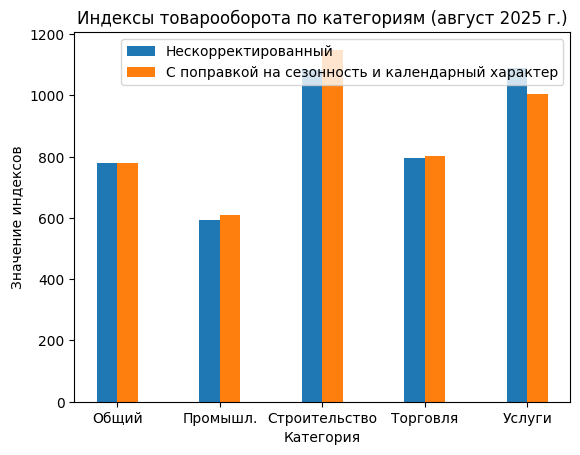

In [9]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Общий', 'Промышл.', 'Строительство', 'Торговля', 'Услуги']
unadjusted = [779.2, 592.4, 1083.6, 794.2, 1089.3]
adjusted = [780.7, 609.0, 1149.2, 801.6, 1004.4]

x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, unadjusted, width, label='Нескорректированный')
rects2 = ax.bar(x + width/2, adjusted, width, label='С поправкой на сезонность и календарный характер')

ax.set_xlabel('Категория')
ax.set_ylabel('Значение индексов')
ax.set_title('Индексы товарооборота по категориям (август 2025 г.)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

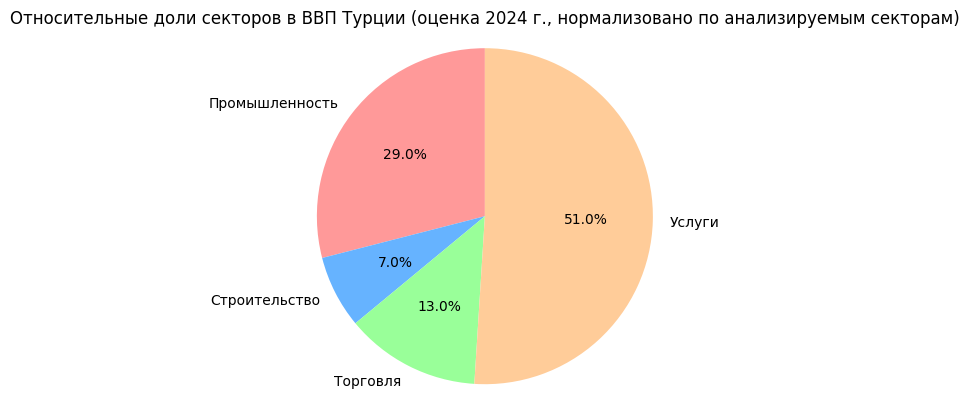

In [20]:
import matplotlib.pyplot as plt

# Доли секторов (нормализованные среди четырёх)
sectors = ['Промышленность', 'Строительство', 'Торговля', 'Услуги']
sizes = [29, 7, 13, 51]  # В процентах

fig, ax = plt.subplots()
ax.pie(sizes, labels=sectors, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax.axis('equal')  # Круглая форма
plt.title('Относительные доли секторов в ВВП Турции (оценка 2024 г., нормализовано по анализируемым секторам)')
plt.show()

In [24]:
import numpy as np
from scipy import stats

x = np.array([779.2, 592.4, 1083.6, 794.2, 1089.3])  # Unadjusted
y = np.array([780.7, 609.0, 1149.2, 801.6, 1004.4])  # Seasonal adjusted

# 1. Shapiro-Wilk
shap_x = stats.shapiro(x)
shap_y = stats.shapiro(y)
print('Shapiro-Wilk:', shap_x, shap_y)

# 2. F-test
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)
f_stat = max(var_x, var_y) / min(var_x, var_y)
dfn = 4  # n-1=4
dfd = 4
p_f = 2 * (1 - stats.f.cdf(f_stat, dfn, dfd))
print('F-test:', p_f)

# 3. t-Student
t_student = stats.ttest_ind(x, y, equal_var=True)
print('t-Student:', t_student)

# 4. t-Welch
t_welch = stats.ttest_ind(x, y, equal_var=False)
print('t-Welch:', t_welch)

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.8822875841863848), pvalue=np.float64(0.31980608585442705)) ShapiroResult(statistic=np.float64(0.964981343643766), pvalue=np.float64(0.842170363975049))
F-test: 0.9669826380459146
t-Student: TtestResult(statistic=np.float64(-0.009222851864994767), pvalue=np.float64(0.9928671781874123), df=np.float64(8.0))
t-Welch: TtestResult(statistic=np.float64(-0.009222851864994767), pvalue=np.float64(0.9928672854055218), df=np.float64(7.996124550250213))


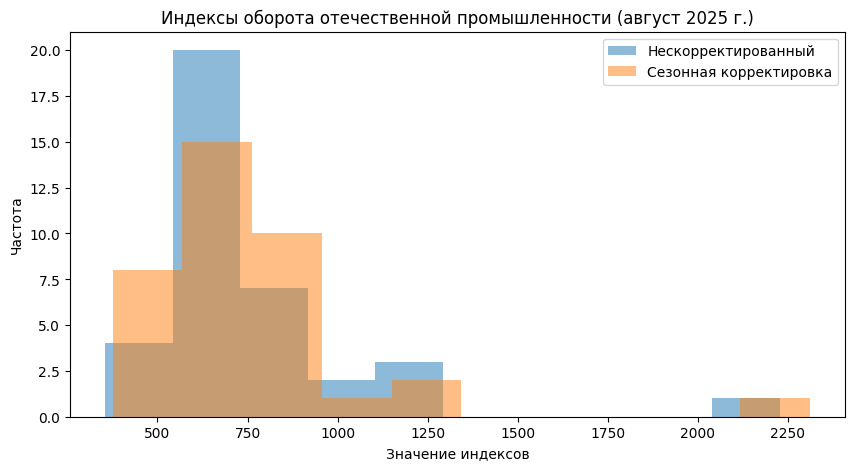

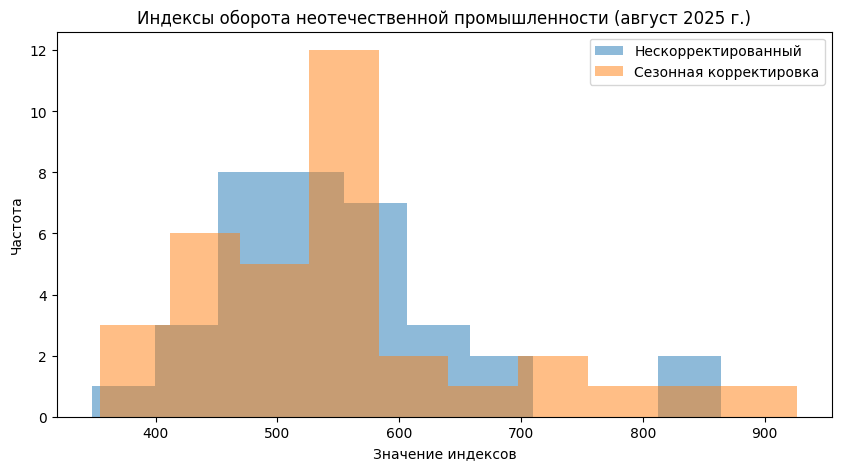

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Domestic
dom_unadj = np.array([621.5, 549.8, 779.5, 701.8, 639.6, 685.3, 911.2, 567.2, 1197.2, 553.6, 1004.5, 2227.7, 613.7, 775.9, 1146.0, 793.6, 355.0, 564.2, 693.6, 650.2, 496.7, 729.5, 586.7, 469.2, 680.8, 566.8, 903.5, 457.0, 611.9, 644.1, 656.8, 619.1, 639.2, 1105.1, 762.9, 948.8, 825.2])
dom_seas = np.array([639.0, 560.5, 776.4, 705.8, 574.6, 783.0, 900.0, 576.9, 1169.9, 544.6, 959.4, 2310.8, 632.0, 806.6, 931.9, 728.6, 375.6, 562.7, 691.1, 644.7, 496.5, 589.4, 508.9, 480.5, 728.0, 588.8, 860.5, 461.3, 640.6, 728.4, 676.7, 663.9, 811.2, 1308.4, 791.9, 941.2, 859.5])

plt.figure(figsize=(10,5))
plt.hist(dom_unadj, bins=10, alpha=0.5, label='Нескорректированный')
plt.hist(dom_seas, bins=10, alpha=0.5, label='Сезонная корректировка')
plt.xlabel('Значение индексов')
plt.ylabel('Частота')
plt.title('Индексы оборота отечественной промышленности (август 2025 г.)')
plt.legend()
plt.show()

# Non-domestic
ndom_unadj = np.array([525.2, 463.4, 403.9, 536.7, 604.1, 646.7, 509.6, 481.3, 542.2, 525.5, 594.3, 649.7, 694.4, 432.1, 472.1, 472.5, 527.2, 594.0, 496.8, 604.1, 536.2, 680.2, 503.6, 465.1, 347.9, 634.4, 486.0, 582.9, 561.5, 575.0, 864.6, 447.5, 464.0, 830.3])
ndom_seas = np.array([539.9, 461.1, 400.4, 531.2, 564.7, 722.4, 491.3, 481.3, 502.8, 540.7, 633.0, 574.3, 678.4, 431.2, 403.2, 423.2, 527.4, 565.6, 423.8, 564.7, 528.5, 756.9, 495.5, 455.3, 354.6, 629.8, 530.3, 568.7, 561.5, 709.2, 926.4, 455.1, 472.8, 820.1])

plt.figure(figsize=(10,5))
plt.hist(ndom_unadj, bins=10, alpha=0.5, label='Нескорректированный')
plt.hist(ndom_seas, bins=10, alpha=0.5, label='Сезонная корректировка')
plt.xlabel('Значение индексов')
plt.ylabel('Частота')
plt.title('Индексы оборота неотечественной промышленности (август 2025 г.)')
plt.legend()
plt.show()

In [27]:
import numpy as np
from scipy import stats

x = np.array([621.5, 549.8, 779.5, 701.8, 639.6, 685.3, 911.2, 567.2, 1197.2, 553.6, 1004.5, 2227.7, 613.7, 775.9, 1146.0, 793.6, 355.0, 564.2, 693.6, 650.2, 496.7, 729.5, 586.7, 469.2, 680.8, 566.8, 903.5, 457.0, 611.9, 644.1, 656.8, 619.1, 639.2, 1105.1, 762.9, 948.8, 825.2])  # Unadjusted
y = np.array([639.0, 560.5, 776.4, 705.8, 574.6, 783.0, 900.0, 576.9, 1169.9, 544.6, 959.4, 2310.8, 632.0, 806.6, 931.9, 728.6, 375.6, 562.7, 691.1, 644.7, 496.5, 589.4, 508.9, 480.5, 728.0, 588.8, 860.5, 461.3, 640.6, 728.4, 676.7, 663.9, 811.2, 1308.4, 791.9, 941.2, 859.5])  # Seasonal adjusted

# 1. Shapiro-Wilk
shap_x = stats.shapiro(x)
shap_y = stats.shapiro(y)
print('Shapiro-Wilk:', shap_x, shap_y)

# 2. F-test
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)
f_stat = max(var_x, var_y) / min(var_x, var_y)
dfn = 4  # n-1=4
dfd = 4
p_f = 2 * (1 - stats.f.cdf(f_stat, dfn, dfd))
print('F-test:', p_f)

# 3. t-Student
t_student = stats.ttest_ind(x, y, equal_var=True)
print('t-Student:', t_student)

# 4. t-Welch
t_welch = stats.ttest_ind(x, y, equal_var=False)
print('t-Welch:', t_welch)

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.7130317469169319), pvalue=np.float64(3.495522797398032e-07)) ShapiroResult(statistic=np.float64(0.6957648448191491), pvalue=np.float64(1.8478990922455682e-07))
F-test: 0.9502595583727278
t-Student: TtestResult(statistic=np.float64(-0.1000778510346249), pvalue=np.float64(0.9205606609850732), df=np.float64(72.0))
t-Welch: TtestResult(statistic=np.float64(-0.1000778510346249), pvalue=np.float64(0.920560966500725), df=np.float64(71.92085740753166))


In [28]:
import numpy as np
from scipy import stats

ndom_unadj = np.array([525.2, 463.4, 403.9, 536.7, 604.1, 646.7, 509.6, 481.3, 542.2, 525.5, 594.3, 649.7, 694.4, 432.1, 472.1, 472.5, 527.2, 594.0, 496.8, 604.1, 536.2, 680.2, 503.6, 465.1, 347.9, 634.4, 486.0, 582.9, 561.5, 575.0, 864.6, 447.5, 464.0, 830.3])
ndom_seas = np.array([539.9, 461.1, 400.4, 531.2, 564.7, 722.4, 491.3, 481.3, 502.8, 540.7, 633.0, 574.3, 678.4, 431.2, 403.2, 423.2, 527.4, 565.6, 423.8, 564.7, 528.5, 756.9, 495.5, 455.3, 354.6, 629.8, 530.3, 568.7, 561.5, 709.2, 926.4, 455.1, 472.8, 820.1])

# 1. Shapiro-Wilk
shap_x = stats.shapiro(x)
shap_y = stats.shapiro(y)
print('Shapiro-Wilk:', shap_x, shap_y)

# 2. F-test
var_x = np.var(x, ddof=1)
var_y = np.var(y, ddof=1)
f_stat = max(var_x, var_y) / min(var_x, var_y)
dfn = 4  # n-1=4
dfd = 4
p_f = 2 * (1 - stats.f.cdf(f_stat, dfn, dfd))
print('F-test:', p_f)

# 3. t-Student
t_student = stats.ttest_ind(x, y, equal_var=True)
print('t-Student:', t_student)

# 4. t-Welch
t_welch = stats.ttest_ind(x, y, equal_var=False)
print('t-Welch:', t_welch)

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.7130317469169319), pvalue=np.float64(3.495522797398032e-07)) ShapiroResult(statistic=np.float64(0.6957648448191491), pvalue=np.float64(1.8478990922455682e-07))
F-test: 0.9502595583727278
t-Student: TtestResult(statistic=np.float64(-0.1000778510346249), pvalue=np.float64(0.9205606609850732), df=np.float64(72.0))
t-Welch: TtestResult(statistic=np.float64(-0.1000778510346249), pvalue=np.float64(0.920560966500725), df=np.float64(71.92085740753166))


In [29]:
from scipy.stats import mannwhitneyu

ndom_unadj = np.array([525.2, 463.4, 403.9, 536.7, 604.1, 646.7, 509.6, 481.3, 542.2, 525.5, 594.3, 649.7, 694.4, 432.1, 472.1, 472.5, 527.2, 594.0, 496.8, 604.1, 536.2, 680.2, 503.6, 465.1, 347.9, 634.4, 486.0, 582.9, 561.5, 575.0, 864.6, 447.5, 464.0, 830.3])
ndom_seas = np.array([539.9, 461.1, 400.4, 531.2, 564.7, 722.4, 491.3, 481.3, 502.8, 540.7, 633.0, 574.3, 678.4, 431.2, 403.2, 423.2, 527.4, 565.6, 423.8, 564.7, 528.5, 756.9, 495.5, 455.3, 354.6, 629.8, 530.3, 568.7, 561.5, 709.2, 926.4, 455.1, 472.8, 820.1])

# Применение критерия Манна–Уитни
statistic, p_value = mannwhitneyu(ndom_unadj, ndom_seas, alternative='two-sided')

print(f"U-статистика: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Распределения можно считать одинаковыми.")
else:
    print("Распределения существенно различаются.")


U-статистика: 605.0000
p-value: 0.7451
Распределения можно считать одинаковыми.


In [30]:
from scipy.stats import mannwhitneyu

ndom_unadj = np.array([621.5, 549.8, 779.5, 701.8, 639.6, 685.3, 911.2, 567.2, 1197.2, 553.6, 1004.5, 2227.7, 613.7, 775.9, 1146.0, 793.6, 355.0, 564.2, 693.6, 650.2, 496.7, 729.5, 586.7, 469.2, 680.8, 566.8, 903.5, 457.0, 611.9, 644.1, 656.8, 619.1, 639.2, 1105.1, 762.9, 948.8, 825.2])  # Unadjusted
ndom_seas = np.array([639.0, 560.5, 776.4, 705.8, 574.6, 783.0, 900.0, 576.9, 1169.9, 544.6, 959.4, 2310.8, 632.0, 806.6, 931.9, 728.6, 375.6, 562.7, 691.1, 644.7, 496.5, 589.4, 508.9, 480.5, 728.0, 588.8, 860.5, 461.3, 640.6, 728.4, 676.7, 663.9, 811.2, 1308.4, 791.9, 941.2, 859.5])  # Seasonal adjusted

# Применение критерия Манна–Уитни
statistic, p_value = mannwhitneyu(ndom_unadj, ndom_seas, alternative='two-sided')

print(f"U-статистика: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Распределения можно считать одинаковыми.")
else:
    print("Распределения существенно различаются.")


U-статистика: 665.0000
p-value: 0.8373
Распределения можно считать одинаковыми.
